<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-louvain
!pip install networkx
!pip install cdlib

In [ ]:
pip install --upgrade networkx

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from random import sample
import numpy as np

In [4]:
filenameTwitter = "/content/twitter/1046661.edges"

In [12]:
filenameFacebook = "/content/facebook/414.edges"

In [8]:
graphTwitter = nx.DiGraph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphTwitter.nodes):
            graphTwitter.add_node(a)
        if b not in list(graphTwitter.nodes):
            graphTwitter.add_node(b)

        graphTwitter.add_edge(a, b)

In [13]:
graphFacebook = nx.Graph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphTwitter.nodes):
            graphTwitter.add_node(a)
        if b not in list(graphTwitter.nodes):
            graphTwitter.add_node(b)

        graphTwitter.add_edge(a, b)

#Question (a)

In [9]:
listOfNodesWithCorrespondingDegrees = list(graphTwitter.degree(list(graphTwitter.nodes)))
sortedListOfNodesWithCorrespondingDegrees = sorted(
    listOfNodesWithCorrespondingDegrees,
    key=lambda t: t[1],
    reverse=True)

tenNodesWithHighestDegree = []

for i in range(0, 10):
  tenNodesWithHighestDegree.append(sortedListOfNodesWithCorrespondingDegrees[i])
  
tenNodes = []

for i in range(0, 10):
  tenNodes.append(tenNodesWithHighestDegree[i][0])
print("The ten chosen nodes are", tenNodes)

The ten chosen nodes are [991221, 1116721, 1117341, 1044591, 678953, 1118781, 1268821, 1047451, 1048661, 1269251]


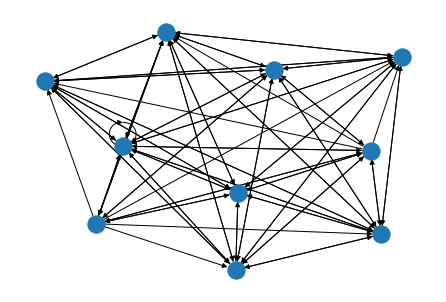

In [10]:
inducedTwitter = nx.induced_subgraph(graphTwitter, tenNodes)
nx.draw(inducedTwitter)

#Question (b)

For community detection, there are the following algorithms:

* Girvan-Newman algorithm
* Greedy_modularity_communities algorithm
* K-means algorithm


#Question (c)

In [7]:
def draw_circular_networkx(G, color_map, name):
  plt.figure(figsize = (20, 20))
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G,node_color=color_map, pos=nx.circular_layout(G))

In [8]:
def draw_plot_networkx(G, color_map, name):
  plt.figure(figsize = (20, 20))
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G ,node_color=color_map, pos=nx.spring_layout(G), with_labels = True, ax=ax)

In [9]:
def get_color_map(nodeGroups):
  listOfColors = []

  for i in range(len(nodeGroups)):
    listOfColors.append(list(np.random.choice(range(255),size=3)))

  for i in range(len(listOfColors)):
    for j in range(3):
      listOfColors[i][j] = listOfColors[i][j] /255

  colorMap = []

  for node in graphTwitter:
    for i in range(len(nodeGroups)):
      if node in nodeGroups[i]:
        colorMap.append(listOfColors[i])
  
  return colorMap

Girvan-Newman algorithm

In [58]:
communitiesGN = community.girvan_newman(graphTwitter)

In [59]:
nodeGroupsGN = []

for community in next(communitiesGN):
  nodeGroupsGN.append(list(community))

print("There is", len(nodeGroupsGN), "communities in the Twitter Ego.")

There is 3 communities in the Twitter Ego.


In [60]:
colorMapGN = get_color_map(nodeGroupsGN)

In [ ]:
draw_plot_networkx(graphTwitter, colorMapGN, "Twitter-Ego with different communities found by Girvan-Newman algorithm")

In [ ]:
draw_circular_networkx(graphTwitter, colorMapGN, "Twitter-Ego with different communities found by Girvan-Newman algorithm")

Greedy-modularity-communities detection algorithm

In [63]:
from networkx.algorithms import community
communitiesGMC = community.greedy_modularity_communities(graphTwitter)

In [64]:
print("There is", len(communitiesGMC), "communities in the Twitter Ego.")

There is 6 communities in the Twitter Ego.


In [65]:
colorMapGMC = get_color_map(communitiesGMC)

In [ ]:
draw_plot_networkx(graphTwitter, colorMapGMC, "Twitter-Ego with different communities found by Greedy-Morality-Communities algorithm")

In [ ]:
draw_circular_networkx(graphTwitter, colorMapGMC, "Twitter-Ego with different communities found by Greedy-Morality-Communities algorithm")

K-clique communities

In [68]:
communityKC = community.k_clique_communities(graphFacebook, 2)

In [69]:
helpList = list(communityKC)

In [70]:
print(helpList)

[]


In [71]:
from community import community_louvain
comms = community_louvain.best_partition(graphFacebook)

In [72]:
unique_coms = np.unique(list(comms.values()))
print(len(unique_coms))

0


In [13]:
len(list(community.asyn_lpa_communities(graphTwitter)))

19